# GROUP 36 PROJECT PROPOSAL
### Predicting Water Levels in Venice

**INTRODUCTION:**
For our project, we are going to observe a dataset that describes water levels in Venice, Italy. This dataset contains data from 1983 to 2015, and includes the water level in centimeters for every hour of every day. Our predictive question is:
### “What will the average water level in Venice be ten years from now?” 
We aim to observe possible trends in the average water level per year starting from 1983 and use that information to predict how much the water level will increase or decrease in the future. Since the dataset ends at the year 2015, we want to predict the water level ten years from that, in 2025. 


**PRELIMINARY DATA ANALYSIS**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

We first loaded in our dataset and tidied it; the original dataset had year, month, date, and and time all in one column, so we separated these into different columns with one value per cell. 

Rows: 289272 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): level
dttm (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,Month,Day,Time,level
<int>,<int>,<int>,<chr>,<dbl>
1983,1,1,01:00:00,44
1983,1,1,02:00:00,35
1983,1,1,03:00:00,23
1983,1,1,04:00:00,10
1983,1,1,05:00:00,1
1983,1,1,06:00:00,-1


Year,Month,Day,Time,level
<int>,<int>,<int>,<chr>,<dbl>
2015,12,31,19:00:00,-19
2015,12,31,20:00:00,-18
2015,12,31,21:00:00,-14
2015,12,31,22:00:00,-5
2015,12,31,23:00:00,8
2016,1,1,00:00:00,20


`summarise()` has grouped output by 'Year', 'Month'. You can override using the
`.groups` argument.


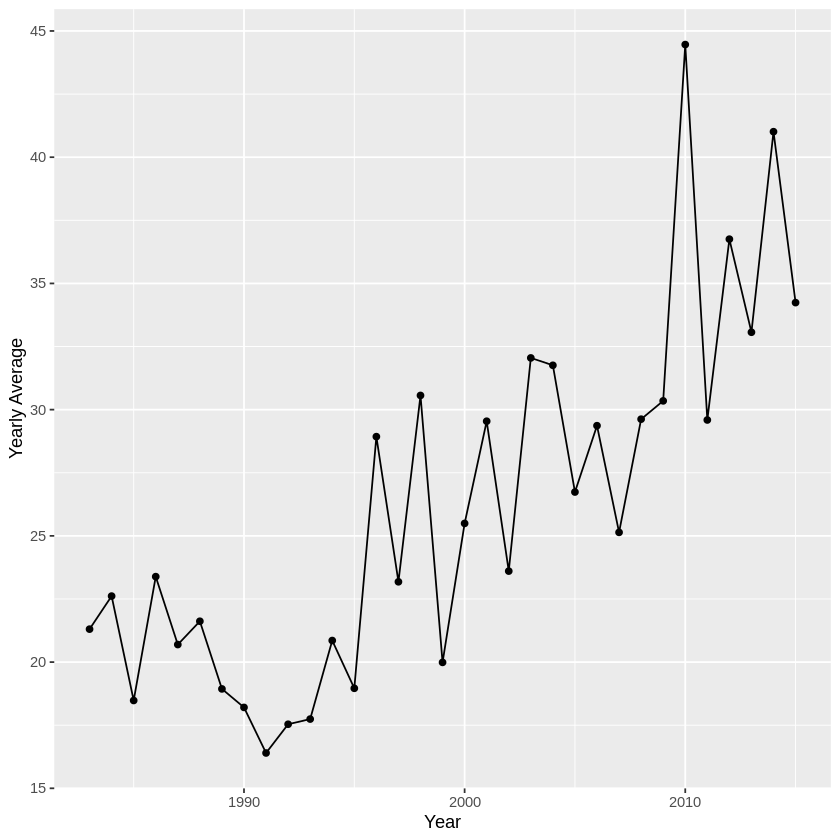

In [17]:
data<-read_csv('venezia.csv') |>separate(col=datetime, into=c('Year', 'Month', 'Date'), sep='-', convert=TRUE) |>
                                separate(col=Date, into=c('Day', 'Time'), sep=" ", convert=TRUE)

head(data)
tail(data)

filtered_data <- data |>  
filter( Day == "1")

mean_monthly_data <- filtered_data |> 
group_by(Year, Month, Day) |>
summarize(mean_daily = mean(level))

yearly_mean <- mean_monthly_data |>
group_by(Year) |>
summarize(mean_year = mean(mean_daily)) |>
slice(-34)

graph_data <- yearly_mean |>
ggplot(aes( x = Year, y = mean_year))+
geom_point()+
geom_line() +
labs( x = "Year", y = "Yearly Average")

graph_data


Initially we wanted to look at just the first day of every month at a specific time, for example; 12 pm of every first day. However, we realized that this does not account for high and low tide periods of each day. Therefore, we changed our method to take the mean water level of the entire day, as this takes into consideration different tides throughout the day.